# Matplotlib

[Matplotlib](https://matplotlib.org/) é uma biblioteca *Python* para geração de gráficos, capaz de gerar figuras com qualidade de publicação em diversos formatos. A biblioteca permite criar gráficos de pontos e linhas, histogramas, densidades espectrais, gráficos de superfície e outros tipos com apenas algumas linhas de código. Os tipos de gráficos mais comuns são oferecidos pelo módulo *pyplot*, geralmente importado com o apelido *plt*. É possível controlar os estilos de linhas e pontos, propriedades das fontes e dos eixos, legendas, etc, usando uma interface orientada a objetos. As funções de *Matplotlib* são familiares a usuários de R e sobretudo de MATLAB.

In [1]:
import matplotlib.pyplot as plt

## Conceitos gerais

A biblioteca *matplotlib* é composta por uma imensa quantidade de funções, o que pode ser até assustador para novos usuários. A ideia da biblioteca é ajudar na visualização de dados com todo o controle necessário, de forma que na maior parte do tempo o usuário usará comandos simples e de alto-nível, mas mantendo a possibilidade de usar comandos de baixo-nível que permitem controlar partes bem específicas dos seus gráficos.

Todo o código de *matplotlib* é organizado em uma hierarquia. No topo da hierarquia, temos um ambiente de "máquina de estado" controlado pelo módulo *matplotlib.pyplot*. Nesse nível, o usuário tem acesso a funções simples para adicionar elementos gráficos (linhas, images, texto, etc) aos eixos da figura atual.

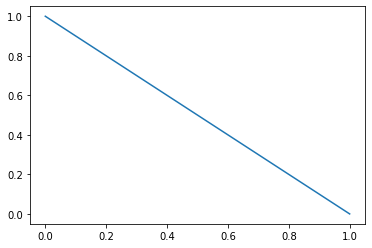

In [2]:
plt.plot([0, 1], [1, 0])

O nível seguinte na hierarquia é o primeiro que usa uma interface orientada a objetos. Nesse nível, as funções de *pyplot* são usadas para criar objetos, como figuras e os eixos delas, e o usuário explicitamente controla os objetos das figuras e dos eixos. Após criar as figuras e seus eixos, os últimos são usados para a maior parte das ações de geração dos gráficos. 

Para ainda mais controle, o que pode ser útil para usar gráficos *matplotlib* em aplicações, o nível de *pyplot* pode ser deixado de lado totalmente. Nesse caso, o desenvolvedor usaria apenas a interface orientada a objetos.

## Partes de uma figura

<figure>
  <img src="../images/anatomy.png" alt="Anatomia de uma figura do matplotlib"/>
  <figcaption>Figura 1: Anatomia de uma figura do matplotlib. Fonte: matplotlib.org</figcaption>
</figure>

### Figure

A figura inteira. O objeto *Figure* mantém registro de um ou mais objetos *Axes*, um conjunto de "artistas" (títulos, legendas, etc) e a tela (*canvas*) onde tudo é desenhado. Uma figura pode conter qualquer número de *Axes*, mas pra que ela seja útil, pelo menos um é necessário. A forma mais fácil de criar uma figura é usando *pyplot*:

In [3]:
fig = plt.figure()  # figura vazia sem Axes

<Figure size 432x288 with 0 Axes>

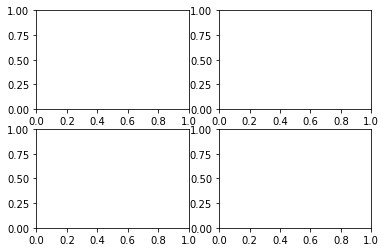

In [4]:
fig, ax_lst = plt.subplots(
    2, 2
)  # figura com grid 2x2 grid de Axes

### Axes

Esse objeto é o que pode ser de fato pensado como "um gráfico", sendo a região da imagem que contém o espaço de dados. Cada objeto *Axes* pode pertencer a apenas uma *Figure* e contém dois (ou três, em gráficos 3D) objetos do tipo *Axis* que controlam os limites dos dados. Note a diferença entre *Axis* (eixo, singular) e *Axes* (eixos, plural). Cada *Axes* tem um título (definido via set_title()), um rótulo do eixo $x$ (definido via set_xlabel()) e um rótulo do eixo $y$ (set_ylabel()). A classe *Axes* e seus métodos são o principal ponto de entrada para trabalhar com a interface orientada a objetos do *matplotlib*.

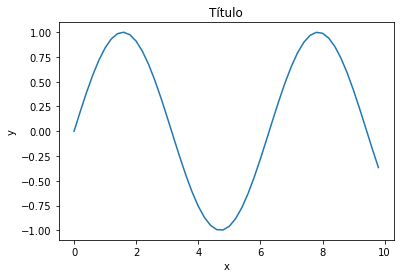

In [5]:
import numpy as np

x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Título')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### Axis

Esses são os eixos individuais do gráfico. Os objetos *Axis* controlam os limites dos eixos e as marcações nos eixos e seus rótulos.


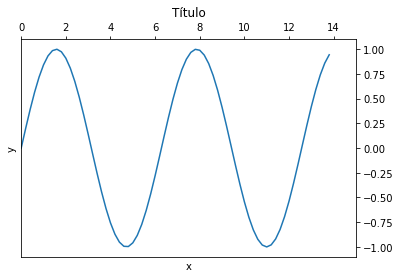

In [6]:
x = np.arange(0, 14, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Título')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([0, 15])

ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('right')

plt.show()

### Artist

Tudo que pode ser visto em uma figura é um artista, incluindo os objetos *Figure*, *Axes* e *Axis*, além de objetos do tipo *Text* (como títulos), *Line2D*, *Patch*, etc. Quando a figura é renderizada, todos os artistas são desenhados na tela.

### Pyplot Vs interface OO

Para funções no módulo *pyplot*, sempre existe uma figura e eixos "atuais" e não explícitos, criados automaticamente. No exemplo a seguir, a primeira chamada a *plt.plot* cria os eixos (*Axes*) e as chamadas seguintes adicionam novas linhas ao mesmo objeto *Axes*.

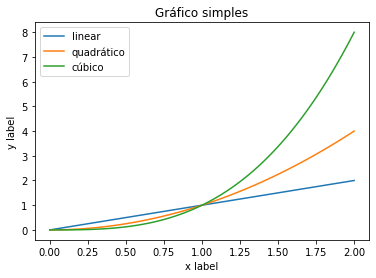

In [7]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadrático')
plt.plot(x, x**3, label='cúbico')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Gráfico simples")

plt.legend()

plt.show()

O mesmo gráfico usando a interface orientada a objetos:

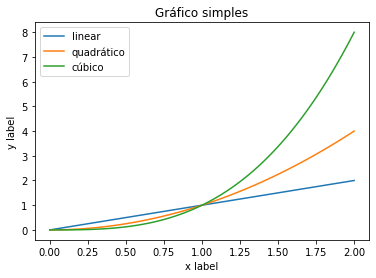

In [8]:
fig, ax = plt.subplots()
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadrático')
ax.plot(x, x**3, label='cúbico')

ax.set_xlabel('x label')
ax.set_ylabel('y label')

ax.set_title("Gráfico simples")

ax.legend()

plt.show()

Os códigos são muito parecidos. Então por que ter duas formas de fazer o mesmo gráfico? Para exemplos simples como esse, a versão *pyplot* pura é suficiente. No entanto, frequentemente terminamos fazendo os mesmos gráficos repetidamente para dados diferentes, mudando apenas pequenos detalhes. Nesses casos, a interface orientada a objetos se torna mais valiosa, por ser mais completa e mais fácil de manter.

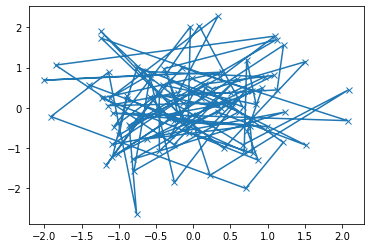

In [9]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

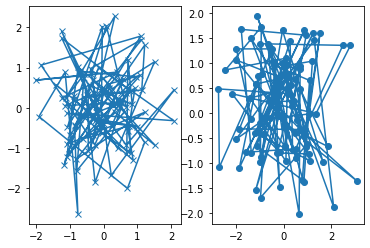

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## Pyplot

Cada função de *pyplot* faz alguma alteração a uma figura, podendo criar a figura, criar uma área gráfica, desenha linhas, decorar o gráfico com texto, etc. Vários estados são preservados através das chamadas das funções. Dessa forma, gerar visualizações com *pyplot* pode ser feito de forma muito simples:

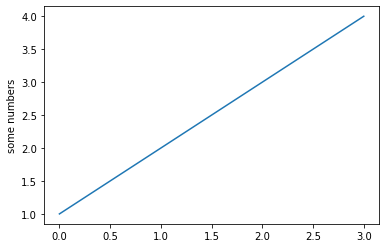

In [11]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

Note que o eixo x assume valores no intervalo $\[0, 3\]$ e o eixo y assume os valores $\[1, 4\]$. Se apenas uma lista ou *array* de valores for passada para o comando *plot*, *matplotlib* assume que os valores pertencem ao eixo y e gera automaticamente os valores de x em um *range(len(y))*.

O comando *plot* é bastante versátil e pode receber quantidades diferentes de argumentos. Por exemplo, para plotar x versus y, pode-se fazer:

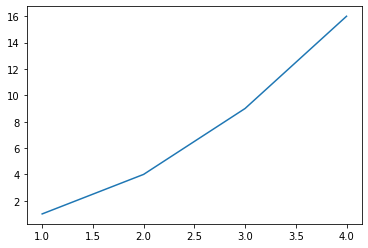

In [12]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

### Formatando o estilo dos gráficos

Para cada par x e y de argumentos, há um terceiro argumento opcional que representa uma *string* de formatação, indicando a cor e o tipo de linha do gráfico. As letras e símbolos da *string* de formatação seguem as convenções de MATLAB. O estilo de formatação padrão é 'b-', que representa uma linha sólida e azul. O código abaixo plota os mesmos valores do gráfico acima, mas usando círculos vermelhos:

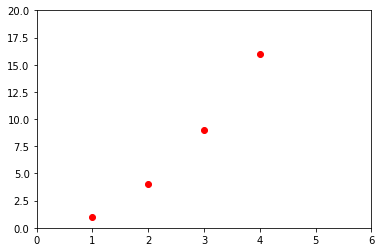

In [13]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

Veja a documentação do comando [*plot()*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) para uma lista completa de estilos e *strings* de formatação. O comando *axis* acima recebe uma lista \[xmin, xmax, ymin, ymax\] e especifica os limites dos eixos do gráfico.

Apesar de os exemplos acima terem usado listas para representar os valores, todas as sequências passadas para *plot* são convertidas para *arrays* internamente. No exemplo abaixo, várias linhas são plotadas com estilos diferentes em um único comando *plot* uasndo *arrays*.

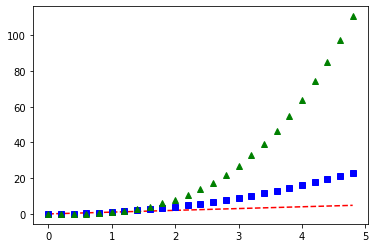

In [14]:
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(
    t, t, 'r--', 
    t, t**2, 'bs', 
    t, t**3, 'g^'
)
plt.show()


O comando *plot* com *strings* de formatação permite escolher entre gráficos de linhas e de pontos. No entanto, plotar gráficos de pontos é possível usar também o comando *scatter*, que permite escolher a cor e o tamanho dos pontos por meio dos argmentos *c* e *s*, respectivamente:

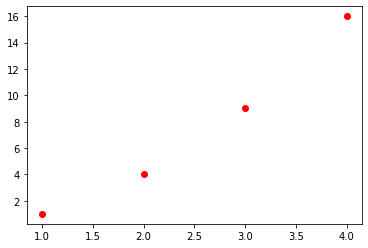

In [15]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')

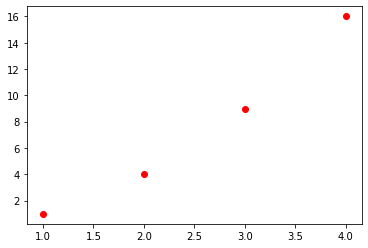

In [16]:
plt.scatter(
    [1, 2, 3, 4], [1, 4, 9, 16], c='r'
)  # semelhante ao exemplo acima

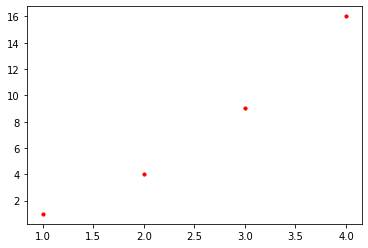

In [17]:
plt.scatter(
    [1, 2, 3, 4], [1, 4, 9, 16], 
    c='r', s=10
)  # pontos menores

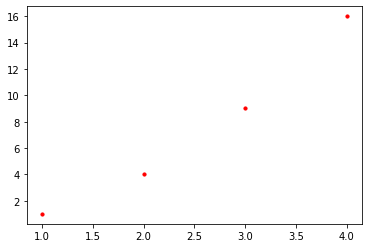

In [18]:
plt.plot(
    [1, 2, 3, 4], [1, 4, 9, 16], 'ro', 
    markersize=np.sqrt(10)
)  # exemplo acima usando plot

Em algumas situações, os dados estão em um formato que permite acessar valores por meio de chaves, como dicionários e *DataFrames*. Nesses casos, é possível usar os comandos *plot* e *scatter* fornecendo o objeto mapeado por chaves ao argumento *data* e gerar gráficos usando as chaves do objeto. Exemplo:

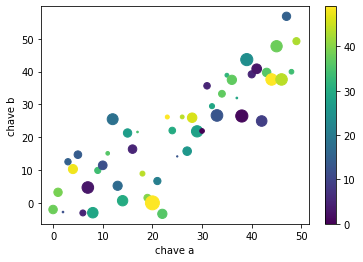

In [19]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('chave a')
plt.ylabel('chave b')
plt.colorbar()
plt.show()

*Matplotlib* permite que suas funções de gráficos recebam variáveis categóricas:

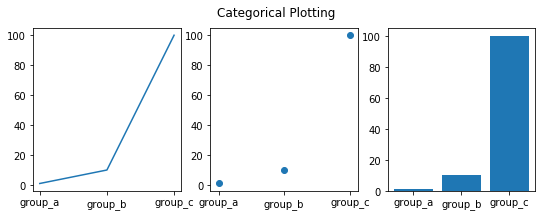

In [20]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.plot(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.bar(names, values)
plt.suptitle('Categorical Plotting')
plt.show()


## Controlando propriedades das linhas

Linhas têm muitos atriutos que podem ser definidos: largura da linha (*linewidth*), estilo de tracejado (*dash style*), suavidade da linha (*antialiased*), etc. Para obter uma lista das propriedades que podem ser modificadas, pode-se chamar a função *setp* com uma linha ou um conjunto de linhas como argumento ou acessar a documentação da classe [*Line2D*](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D).

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: color
  markerfacecoloralt or mfcalt: color
  markersize or ms: float
  m

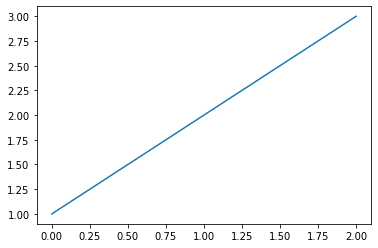

In [21]:
lines = plt.plot([1, 2, 3])

plt.setp(lines)

Para especificar um valor para um atributo pode-se usar argumentos nomeados:

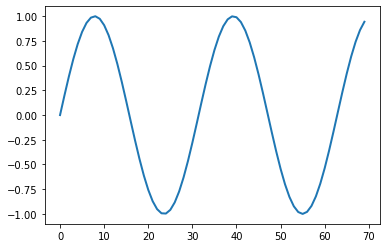

In [22]:
plt.plot(y, linewidth=2.0)

Pode-se também usar os métodos *set_* dos objetos *Line2D*. O comando *plot* retorna uma lista de objetos *Line2D*, e.g. *line1, line2 = plot(x1, y1, x2, y2)*:

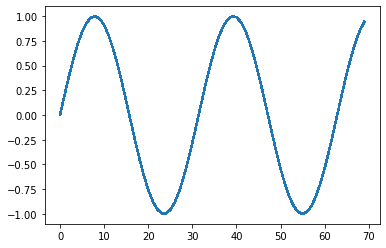

In [23]:
line, = plt.plot(y, '-')
line.set_antialiased(False)

Por último, pode-se usar o comando *setp*, que permite definir múltiplas propriedades para uma linha única ou uma lista de linhas.

[None, None, None, None]

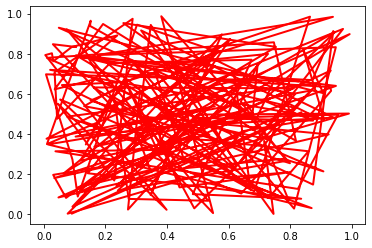

In [24]:
x1, y1 = np.random.random(100), np.random.random(100)
x2, y2 = np.random.random(100), np.random.random(100)

lines = plt.plot(x1, y1, x2, y2)
# argumentos nomeados
plt.setp(lines, color='r', linewidth=2.0)
# pares de strings
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

## Trabalhando com múltiplas figuras

Como mencionado acima, *pyplot* tem o conceito da figura atual e do *Axes* atual, com todos os comandos se aplicando ao *Axes* atual. É possível obter o objeto *Axes* atual por meio da função *gca()* e o objeto *Figure* atual pela função *gcf()*. No entanto, raramente isso é necessário para o usuário. Abaixo, vemos um exemplo com dois sub-gráficos:

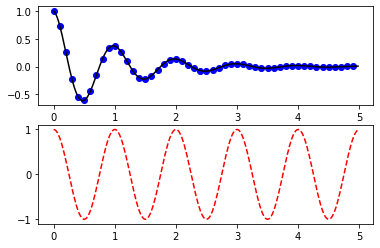

In [25]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

O argumento com três dígitos passado para o comando *subplot* especifica um grid com um número de linhas e de colunas e o número do gráfico no grid, em que esse número vai de 1 a num\_linhas * num\_colunas. Esses argumentos também podem ser separados por vírgulas, i.e. *subplot(211)* é idêntico a *subplot(2, 1, 1)*. Caso num\_linhas * num\_colunas seja maior ou igual a 10, as vírgulas são obrigatórias. O comando *subplot* é sempre chamado por *matplotlib*, mesmo quando o usuário cria um gráfico único. Nesse caso, *subplot(111)* é chamado internamente. Para posicionar gráficos em posições fora de um grid retangular, pode-se usar o comando *axes([esquerda, direita, largura, altura])*, em que cada um desses quatro argumentos pode ser passado no intervalo $(0, 1)$. É possível também criar diversas figuras usando múltiplas chamadas ao comando *figure(número)*:

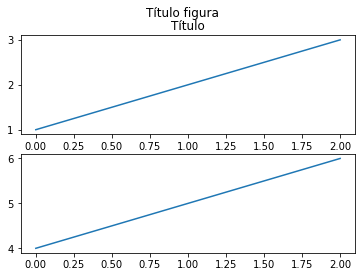

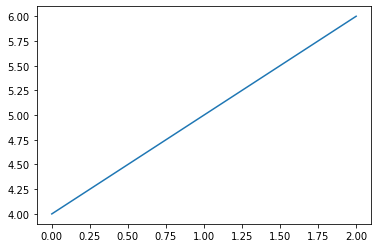

In [26]:
plt.figure(1)                # primeira figura
plt.subplot(211)             # primeiro subplot na primeira figura
plt.title('Título')
plt.plot([1, 2, 3])
plt.subplot(212)             # segundo subplot
plt.plot([4, 5, 6])
plt.suptitle('Título figura')


plt.figure(2)                # segunda figura
plt.plot([4, 5, 6])          # subplot(111) por pdrão

## Trabalhando com texto

O comando *text()* pode ser usado para adicionar textos em locais à escolha do usuário, enquanto os comandos *xlabel()*, *ylabel()*, *title()* e *suptitle()* adicionam textos em locais específicos.

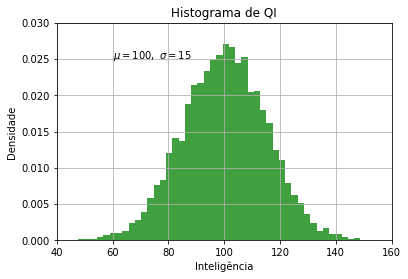

In [27]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# histograma
n, bins, patches = plt.hist(
    x, 50, density=1, facecolor='g', alpha=0.75
)


plt.xlabel('Inteligência')
plt.ylabel('Densidade')
plt.title('Histograma de QI')
plt.text(
    60, .025, r'$\mu=100,\ \sigma=15$'
)  # Note o código LaTeX
   # O r no início é importante
   # Não é necessário ter LaTeX instalado
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Todos os comandos de texto retornam um objeto do tipo *Text*, cujas propriedades podem ser modificadas, assim como as linhas discutidas acima. Para mais informações, ver a [documentação](https://matplotlib.org/tutorials/text/text_props.html) das propriedades de texto.

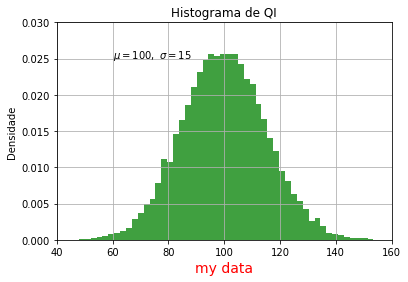

In [28]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# histograma
n, bins, patches = plt.hist(
    x, 50, density=1, facecolor='g', alpha=0.75
)


plt.xlabel('Inteligência')
plt.ylabel('Densidade')
plt.title('Histograma de QI')
plt.text(
    60, .025, r'$\mu=100,\ \sigma=15$'
)  # Note o código LaTeX
   # O r no início é importante
   # Não é necessário ter LaTeX instalado
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
t = plt.xlabel('my data', fontsize=14, color='red')
plt.show()

Um uso comum de texto em gráficos é para destacar características interessantes. Para isso, pode-se usar a função *anotate*, que torna o uso de anotações fácil. Há dois pontos a considerar: a localização a ser destacada, representada pelo argumento xy e a localização do texto, representada pelo argumento xytext. Ambos os argumentos são tuplas. Exemplos simples de anotação podem ser encontrados nos tutoriais de anotação [simples](https://matplotlib.org/tutorials/text/annotations.html#annotations-tutorial) e [avançada](https://matplotlib.org/tutorials/text/annotations.html#plotting-guide-annotation).

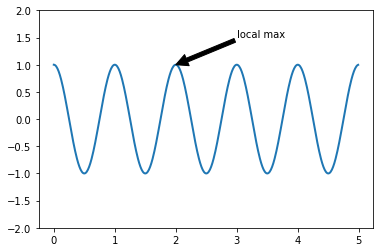

In [29]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black'),
             )

plt.ylim(-2, 2)
plt.show()

## Eixos logarítmicos e não-lineares

*Matplotlib* torna fácil o uso de eixos em escalas diferentes para dados de magnitudes diferentes:

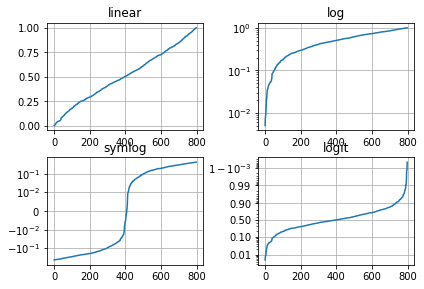

In [30]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

### Histogramas

A função *hist* retorna uma tupla com 3 componentes. O primeiro componente é o número de elementos em cada intervalo. O segundo componente contém os limites dos intervalos. Por fim, o terceiro componente é a lista de objetos do tipo *Patch* que correspondem aos retângulos. O único argumento obrigatório da função *hist* é o *array* ou *list* com os dados que serão usados para montar o histograma.

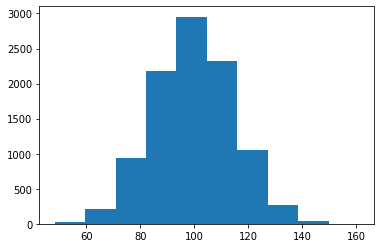

[2.600e+01 2.100e+02 9.330e+02 2.176e+03 2.954e+03 2.324e+03 1.057e+03
 2.740e+02 4.400e+01 2.000e+00]
[ 48.33103523  59.60788654  70.88473784  82.16158915  93.43844046
 104.71529177 115.99214307 127.26899438 138.54584569 149.82269699
 161.0995483 ]
<a list of 10 Patch objects>


In [45]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

n, bins, patches = plt.hist(x)
plt.show()

print(n)
print(bins)
print(patches)

Cada objeto *Patch* pode ser acessado para mudar suas propriedades, assim com as linhas e pontos dos outros gráficos:

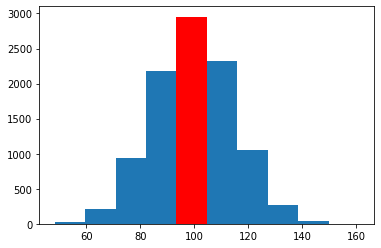

In [46]:
n, bins, patches = plt.hist(x)

patches[np.argmax(n)].set_facecolor('r')

plt.show()

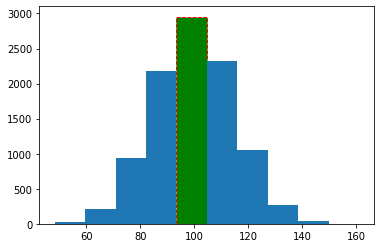

In [47]:
n, bins, patches = plt.hist(x)

patches[np.argmax(n)].set_facecolor('g')
patches[np.argmax(n)].set_edgecolor('r')
patches[np.argmax(n)].set_linestyle('--')

plt.show()

O primeiro parâmetro opcional é a quantidade de intervalos (*bins*), que pode ser passado de forma posicional:

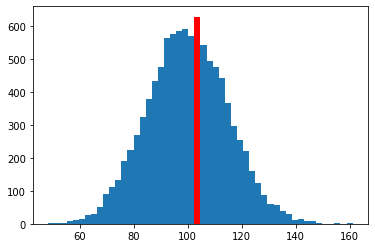

In [48]:
n, bins, patches = plt.hist(x, bins=50)
# n, bins, patches = plt.hist(x, 50)

patches[np.argmax(n)].set_facecolor('r')

plt.show()

Outro argumento importante é o argumento nomeado *density*, cujo valor define se as contagens devem ser normalizadas para formar uma densidade de probabilidade.

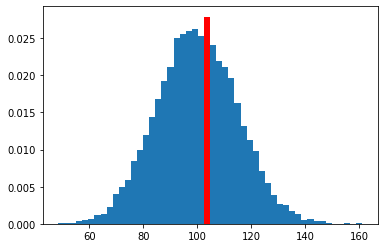

In [49]:
n, bins, patches = plt.hist(
    x, 
    bins=50,
    density=True
)

patches[np.argmax(n)].set_facecolor('r')

plt.show()

Para desenhar um histograma acumulado, usa-se o argumento *cumulative*:

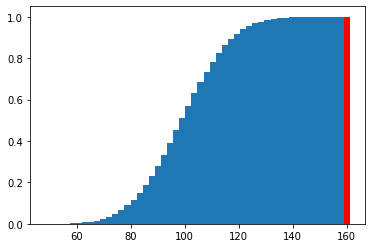

In [50]:
n, bins, patches = plt.hist(
    x, 
    bins=50,
    density=True,
    cumulative=True
)

patches[np.argmax(n)].set_facecolor('r')

plt.show()

A função *hist* também pode desenhar diversos histogramas de uma vez só:

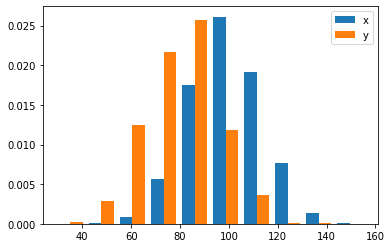

[array([0.00000000e+00, 9.44348275e-05, 8.97130861e-04, 5.70543749e-03,
       1.75176605e-02, 2.61269689e-02, 1.91387917e-02, 7.70430801e-03,
       1.36930500e-03, 1.41652241e-04]), array([2.36087069e-04, 2.91174051e-03, 1.25126146e-02, 2.17200103e-02,
       2.57334905e-02, 1.18043534e-02, 3.62000172e-03, 7.86956896e-05,
       7.86956896e-05, 0.00000000e+00])]
[ 28.79829671  41.50547299  54.21264927  66.91982555  79.62700183
  92.33417811 105.04135439 117.74853067 130.45570695 143.16288323
 155.87005951]
<a list of 2 Lists of Patches objects>


In [58]:
mu_x, sigma_x = 100, 15
x = mu_x + sigma_x * np.random.randn(10000)

mu_y, sigma_y = 80, 15
y = mu_y + sigma_y * np.random.randn(1000)

n, bins, patches = plt.hist(
    [x, y], 
    density=True,
    label=['x', 'y']
)

plt.legend()
plt.show()

print(n)
print(bins)
print(patches)

Os histogramas podem ser desenhados lado a lado, como acima ou sobrepostos, usando o argumento *stacked*:

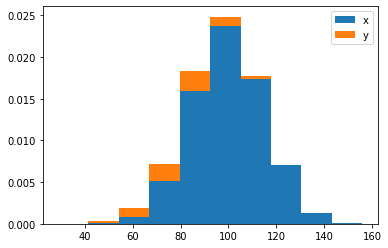

[array([0.00000000e+00, 8.58498432e-05, 8.15573510e-04, 5.18676136e-03,
       1.59251459e-02, 2.37517899e-02, 1.73989016e-02, 7.00391637e-03,
       1.24482273e-03, 1.28774765e-04]), array([2.14624608e-05, 3.50553526e-04, 1.95308393e-03, 7.16130775e-03,
       1.82645541e-02, 2.48249130e-02, 1.77279926e-02, 7.01107053e-03,
       1.25197688e-03, 1.28774765e-04])]
[ 28.79829671  41.50547299  54.21264927  66.91982555  79.62700183
  92.33417811 105.04135439 117.74853067 130.45570695 143.16288323
 155.87005951]
<a list of 2 Lists of Patches objects>


In [62]:
n, bins, patches = plt.hist(
    [x, y], 
    density=True,
    stacked=True,
    label=['x', 'y']
)

plt.legend()
plt.show()

print(n)
print(bins)
print(patches)

Pode ser útil que um histograma fique mais transparente do que o outro. Nesse caso, pode-se simplesmente plotar os histogramas separadamente:

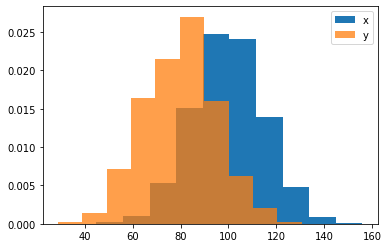

In [63]:
plt.hist(
    x, 
    density=True,
    label=['x']
)

plt.hist(
    y, 
    density=True,
    label=['y'],
    alpha=0.75
)

plt.legend()
plt.show()

## Outros exemplos de gráficos

Para mais exemplos e tutoriais avançados, pode-se checar o [guia do usuário](https://matplotlib.org/users/index.html) do Matplolib.